# Zadanie 1

In [1]:
import pandas as pd

column_names = [
    "Wine", "Alcohol", "Malic.acid", "Ash", "Acl", "Mg", 
    "Phenols", "Flavanoids", "Nonflavanoid.phenols", 
    "Proanth", "Color.int", "Hue", "OD", "Proline"
]

df = pd.read_csv("wine.csv", header=None, names=column_names)

print("Pierwsze 5 wierszy danych:")
print(df.head())

print("\nInformacje o danych:")
print(df.info())

print("\nStatystyki opisowe:")
print(df.describe())

print("\nNazwy kolumn:")
print(df.columns.tolist())


Pierwsze 5 wierszy danych:
   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0  Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids   
1     1    14.23        1.71  2.43  15.6  127      2.8        3.06   
2     1     13.2        1.78  2.14  11.2  100     2.65        2.76   
3     1    13.16        2.36  2.67  18.6  101      2.8        3.24   
4     1    14.37        1.95   2.5  16.8  113     3.85        3.49   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0  Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
1                   .28     2.29       5.64  1.04  3.92     1065  
2                   .26     1.28       4.38  1.05   3.4     1050  
3                    .3     2.81       5.68  1.03  3.17     1185  
4                   .24     2.18        7.8   .86  3.45     1480  

Informacje o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 14 columns):
 #   Column            

# Zadanie 2

Wyjaśniona wariancja przez główne składowe:
PC1: 0.36, PC2: 0.19


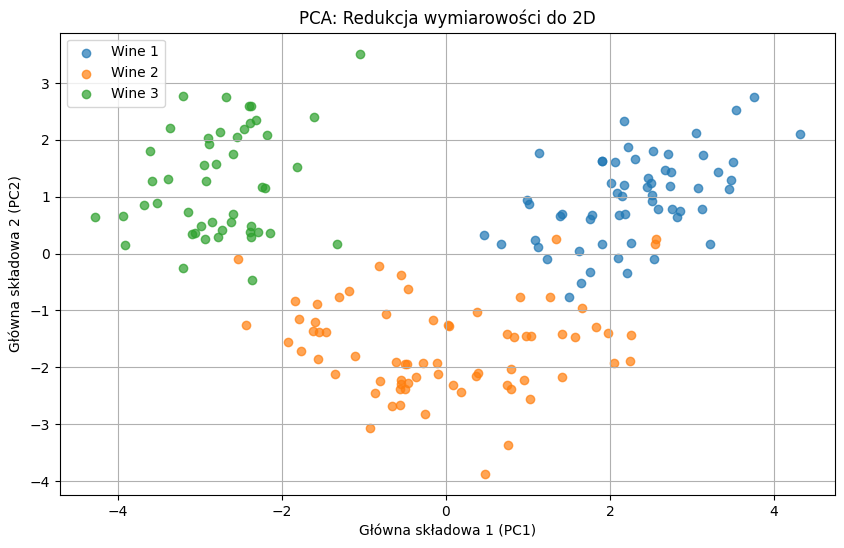


Wagi cech dla głównych składowych:
                           PC1       PC2
Alcohol               0.144329  0.483652
Malic.acid           -0.245188  0.224931
Ash                  -0.002051  0.316069
Acl                  -0.239320 -0.010591
Mg                    0.141992  0.299634
Phenols               0.394661  0.065040
Flavanoids            0.422934 -0.003360
Nonflavanoid.phenols -0.298533  0.028779
Proanth               0.313429  0.039302
Color.int            -0.088617  0.529996
Hue                   0.296715 -0.279235
OD                    0.376167 -0.164496
Proline               0.286752  0.364903


In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

column_names = [
    "Wine", "Alcohol", "Malic.acid", "Ash", "Acl", "Mg", 
    "Phenols", "Flavanoids", "Nonflavanoid.phenols", 
    "Proanth", "Color.int", "Hue", "OD", "Proline"
]

df = pd.read_csv("wine.csv")

# print(df.head())  # Wyświetlenie pierwszych 5 wierszy
# print(df.info())  # Informacje o typach danych


X = df.iloc[:, 1:]  
y = df["Wine"]    

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
print("Wyjaśniona wariancja przez główne składowe:")
print(f"PC1: {explained_variance_ratio[0]:.2f}, PC2: {explained_variance_ratio[1]:.2f}")

df_pca = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])
df_pca["Wine"] = y

plt.figure(figsize=(10, 6))
for wine_class in df_pca["Wine"].unique():
    subset = df_pca[df_pca["Wine"] == wine_class]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Wine {wine_class}", alpha=0.7)

plt.title("PCA: Redukcja wymiarowości do 2D")
plt.xlabel("Główna składowa 1 (PC1)")
plt.ylabel("Główna składowa 2 (PC2)")
plt.legend()
plt.grid(True)
plt.show()

components = pd.DataFrame(
    pca.components_,
    columns=X.columns,
    index=["PC1", "PC2"]
)
print("\nWagi cech dla głównych składowych:")
print(components.T)


# Zadanie 3

Ocena jakości klasteryzacji (KMeans):
Silhouette: 0.5601697480957203
Davies-Bouldin: 0.5977226208167409
ARI: 0.8961671105205941
Jaccard: 0.005813953488372093

Ocena jakości klasteryzacji (DBSCAN):
Silhouette: 0.32303613524396435
Davies-Bouldin: 1.3882882213886694
ARI: 0.37903391744182025
Jaccard: 0.13715627095908786


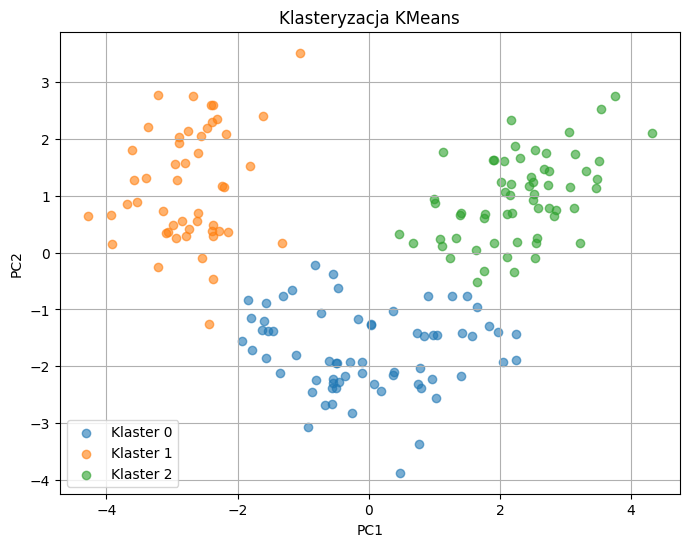

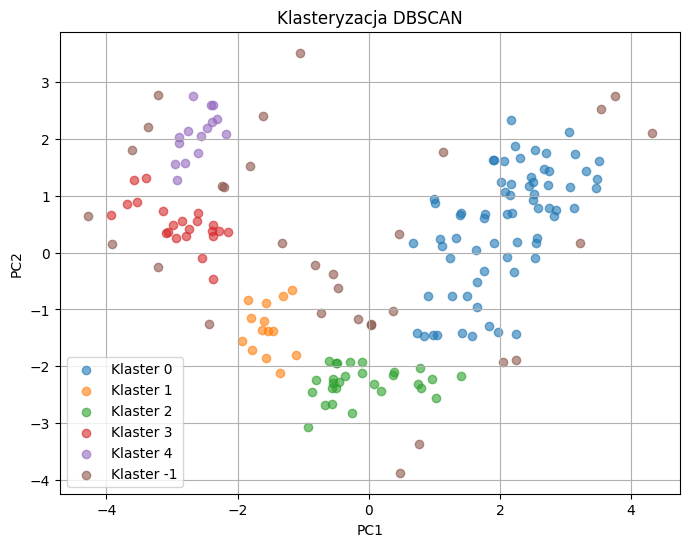

In [19]:
df = pd.read_csv("wine.csv")

X = df.iloc[:, 1:] 
y = df["Wine"]

X = X.apply(pd.to_numeric, errors="coerce")

X = X.dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# --- Klasteryzacja ---

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

dbscan = DBSCAN(eps=0.5, min_samples=5)  
dbscan_labels = dbscan.fit_predict(X_pca)

# --- Ocena jakości klasteryzacji ---

def evaluate_clustering(labels, true_labels):
    results = {}
    
    if len(set(labels)) > 1:  
        results["Silhouette"] = silhouette_score(X_pca, labels)
        results["Davies-Bouldin"] = davies_bouldin_score(X_pca, labels)
    else:
        results["Silhouette"] = None
        results["Davies-Bouldin"] = None
    
    results["ARI"] = adjusted_rand_score(true_labels, labels)
    results["Jaccard"] = jaccard_score(true_labels, labels, average="macro")
    
    return results

kmeans_results = evaluate_clustering(kmeans_labels, y)

dbscan_results = evaluate_clustering(dbscan_labels, y)

# --- Wyświetlenie wyników ---

print("Ocena jakości klasteryzacji (KMeans):")
for metric, score in kmeans_results.items():
    print(f"{metric}: {score}")

print("\nOcena jakości klasteryzacji (DBSCAN):")
for metric, score in dbscan_results.items():
    print(f"{metric}: {score}")

# --- Wizualizacja klasteryzacji ---

def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    unique_labels = set(labels)
    for label in unique_labels:
        cluster = X[labels == label]
        plt.scatter(cluster[:, 0], cluster[:, 1], label=f"Klaster {label}", alpha=0.6)
    plt.title(title)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_clusters(X_pca, kmeans_labels, "Klasteryzacja KMeans")

plot_clusters(X_pca, dbscan_labels, "Klasteryzacja DBSCAN")


# Zadanie 4

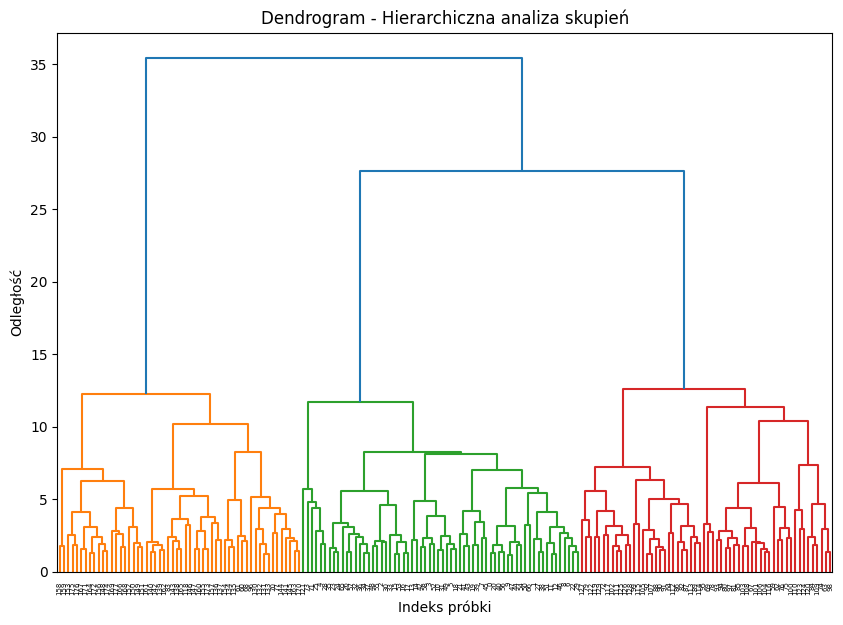

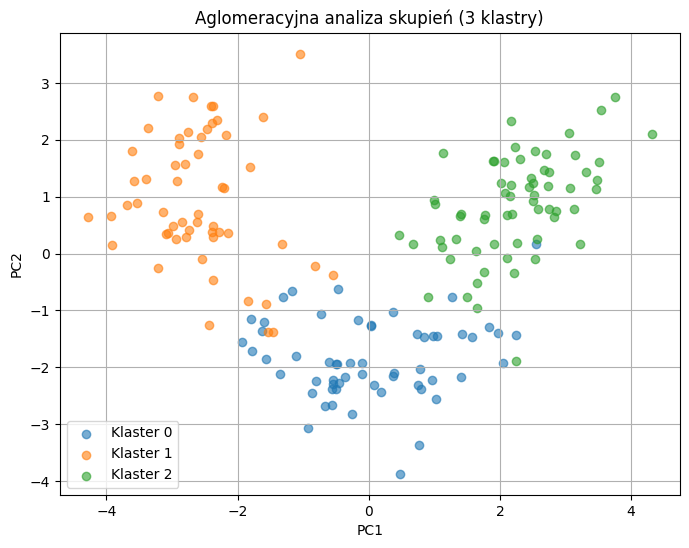

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# --- Wczytanie danych i przygotowanie PCA (z zadania 2) ---

# Wczytanie danych
df = pd.read_csv("wine.csv")

X = df.iloc[:, 1:]  
y = df["Wine"]

X = X.apply(pd.to_numeric, errors="coerce")

X = X.dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# --- Generowanie dendrogramu ---

Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogram - Hierarchiczna analiza skupień")
plt.xlabel("Indeks próbki")
plt.ylabel("Odległość")
plt.show()


# --- Aglomeracyjna analiza skupień ---

n_clusters = 3
agglo = AgglomerativeClustering(n_clusters=n_clusters)

agglo_labels = agglo.fit_predict(X_scaled)

# --- Wizualizacja wyników ---

def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    unique_labels = set(labels)
    for label in unique_labels:
        cluster = X[labels == label]
        plt.scatter(cluster[:, 0], cluster[:, 1], label=f"Klaster {label}", alpha=0.6)
    plt.title(title)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Wizualizacja wyników aglomeracyjnej analizy skupień
plot_clusters(X_pca, agglo_labels, "Aglomeracyjna analiza skupień (3 klastry)")


# Zadanie 5

Optymalna liczba klastrów: 3


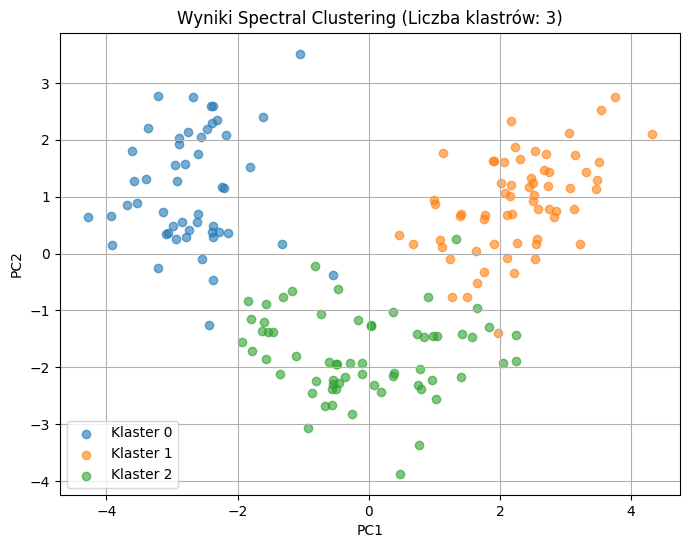

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

df = pd.read_csv("wine.csv")

X = df.iloc[:, 1:]
y = df["Wine"]

X = X.apply(pd.to_numeric, errors="coerce")

X = X.dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# --- Przeprowadzenie widmowej analizy skupień ---

n_clusters_range = range(2, 6)
silhouette_scores = []

for n_clusters in n_clusters_range:
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
    spectral_labels = spectral.fit_predict(X_scaled)
    
    silhouette_avg = silhouette_score(X_scaled, spectral_labels)
    silhouette_scores.append(silhouette_avg)

optimal_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]
print(f"Optymalna liczba klastrów: {optimal_n_clusters}")

# --- Widmowa analiza skupień z optymalną liczbą klastrów ---

spectral_optimal = SpectralClustering(n_clusters=optimal_n_clusters, affinity='nearest_neighbors', random_state=42)
spectral_labels_optimal = spectral_optimal.fit_predict(X_scaled)

# --- Wizualizacja wyników w przestrzeni PCA ---

def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    unique_labels = set(labels)
    for label in unique_labels:
        cluster = X[labels == label]
        plt.scatter(cluster[:, 0], cluster[:, 1], label=f"Klaster {label}", alpha=0.6)
    plt.title(title)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_clusters(X_pca, spectral_labels_optimal, f"Wyniki Spectral Clustering (Liczba klastrów: {optimal_n_clusters})")


# Zadanie 6

Wariancja wyjaśniana przez 2 składowe PCA: [0.36198848 0.1920749 ]


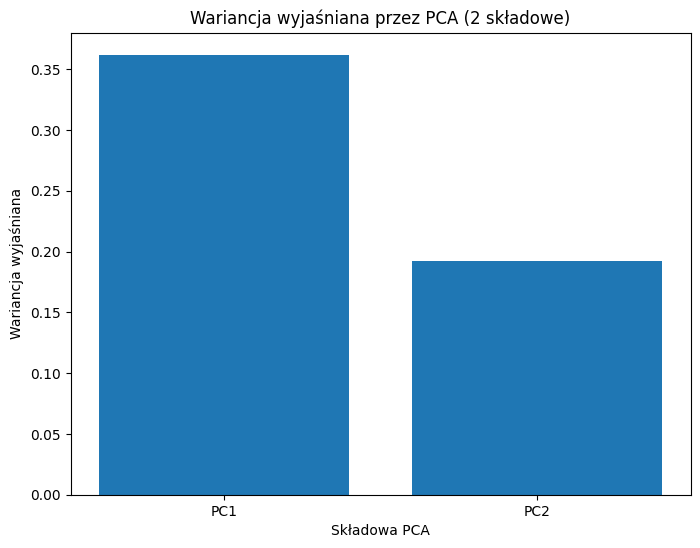

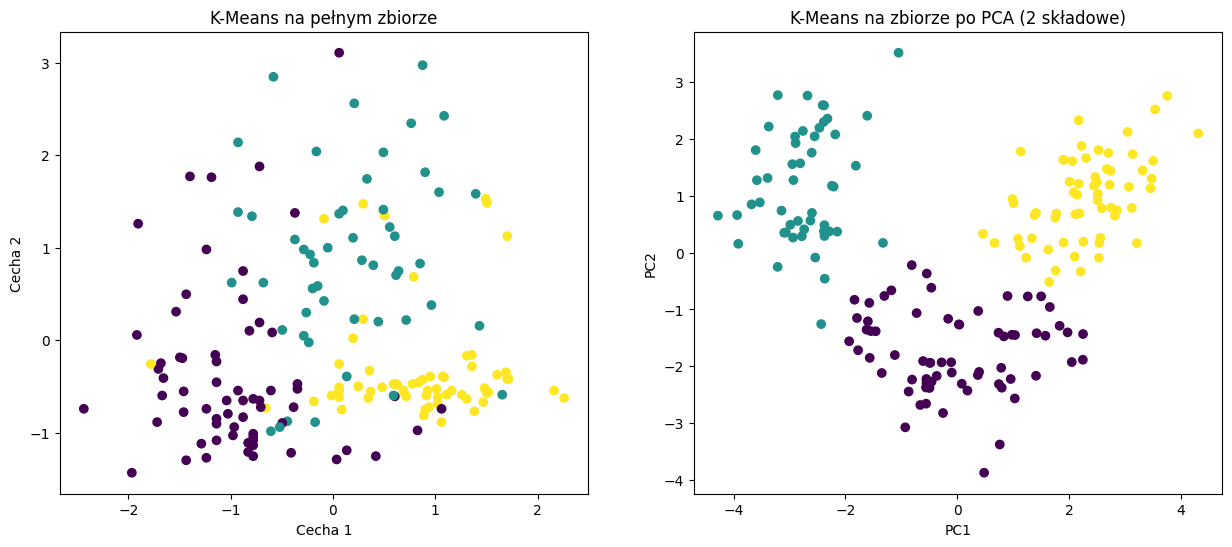

Wariancja skumulowana po 2 składowych: 0.5540633835693526
Optymalna liczba składowych PCA dla wariancji 90%: 1


In [23]:
from sklearn.datasets import load_wine
from sklearn.metrics import silhouette_score

data = load_wine()
X = data.data  # Cechy
y = data.target  # Etykiety


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
print(f'Wariancja wyjaśniana przez 2 składowe PCA: {explained_variance}')

plt.figure(figsize=(8, 6))
plt.bar(range(1, 3), explained_variance, tick_label=["PC1", "PC2"])
plt.title("Wariancja wyjaśniana przez PCA (2 składowe)")
plt.xlabel("Składowa PCA")
plt.ylabel("Wariancja wyjaśniana")
plt.show()


kmeans_full = KMeans(n_clusters=3, random_state=42)
y_kmeans_full = kmeans_full.fit_predict(X_scaled)

kmeans_pca = KMeans(n_clusters=3, random_state=42)
y_kmeans_pca = kmeans_pca.fit_predict(X_pca)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans_full, cmap='viridis')
axes[0].set_title("K-Means na pełnym zbiorze")
axes[0].set_xlabel("Cecha 1")
axes[0].set_ylabel("Cecha 2")

axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans_pca, cmap='viridis')
axes[1].set_title("K-Means na zbiorze po PCA (2 składowe)")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")

plt.show()


cumulative_variance = np.cumsum(explained_variance)
print(f'Wariancja skumulowana po 2 składowych: {cumulative_variance[-1]}')

# Obliczamy, ile składowych jest potrzebnych do uzyskania co najmniej 90% wariancji
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f'Optymalna liczba składowych PCA dla wariancji 90%: {n_components_90}')


# Zadanie 7

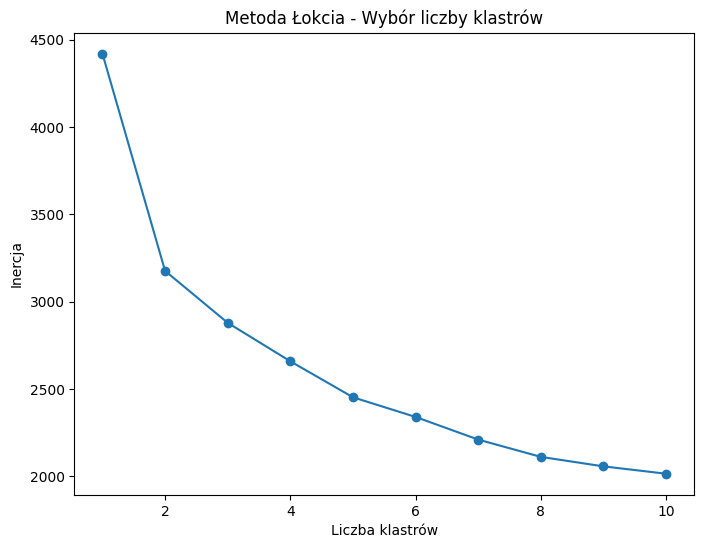

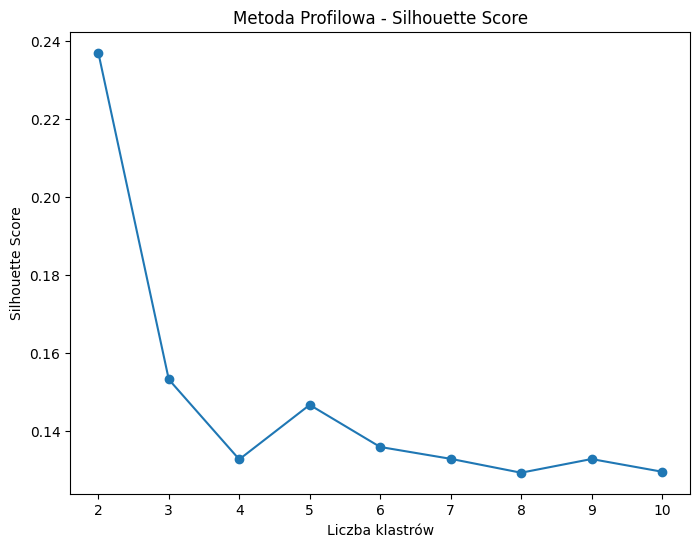

Optymalna liczba klastrów KMeans++ (na podstawie silhouette score): 2
Silhouette Score dla KMeans: 0.2370
Silhouette Score dla Agglomerative Clustering: 0.1800
Średnie wartości cech dla klastrów KMeans:
[[-0.37408814 -0.33638826 -0.53621966 -0.46413515 -0.54282015 -0.57778346
   0.55727904 -0.75049888 -0.68102574 -0.54965139]
 [ 0.34795098  0.31288515  0.49875453  0.43170649  0.50489385  0.53741431
  -0.51834252  0.69806228  0.63344316  0.5112478 ]]
Średnie wartości cech dla klastrów Agglomerative Clustering:
[[ 0.17346427  0.03886507  0.42512726  0.29052304  0.35281937  0.3932522
  -0.36968596  0.47388978  0.41994506  0.28717418]
 [-0.31488737 -0.07055125 -0.77172783 -0.52738259 -0.64046829 -0.71386545
   0.67108598 -0.86024578 -0.76232066 -0.52130345]]


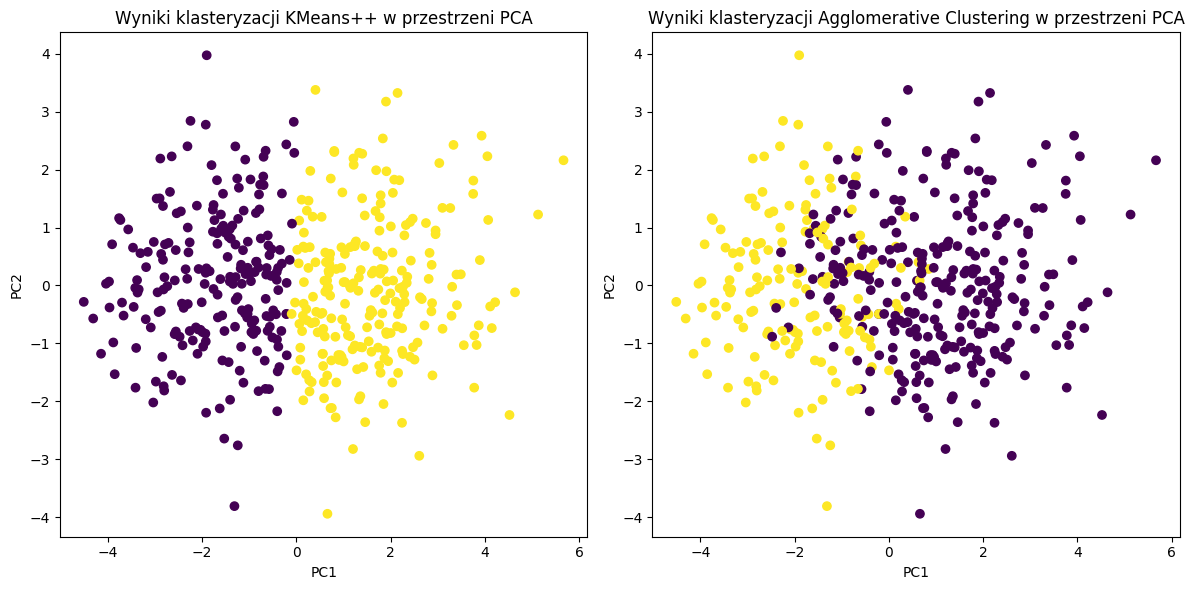

In [26]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Klasteryzacja KMeans++ (Łokieć i Profilowa)

inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Metoda Łokcia - Wybór liczby klastrów")
plt.xlabel("Liczba klastrów")
plt.ylabel("Inercja")
plt.show()

silhouette_scores = []
for n_clusters in range(2, 11):  # Silhouette Score wymaga minimum 2 klastrów
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Metoda Profilowa - Silhouette Score")
plt.xlabel("Liczba klastrów")
plt.ylabel("Silhouette Score")
plt.show()

optimal_clusters_kmeans = np.argmax(silhouette_scores) + 2
print(f'Optymalna liczba klastrów KMeans++ (na podstawie silhouette score): {optimal_clusters_kmeans}')

kmeans_optimal = KMeans(n_clusters=optimal_clusters_kmeans, init='k-means++', random_state=42)
kmeans_labels = kmeans_optimal.fit_predict(X_scaled)

# 3. Klasteryzacja hierarchiczna
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters_kmeans)
agg_labels = agg_clustering.fit_predict(X_scaled)

# 4. Ocena jakości klastrów i analiza cech

silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
silhouette_agg = silhouette_score(X_scaled, agg_labels)

print(f"Silhouette Score dla KMeans: {silhouette_kmeans:.4f}")
print(f"Silhouette Score dla Agglomerative Clustering: {silhouette_agg:.4f}")

def calculate_cluster_means(X, labels):
    cluster_means = []
    for cluster in np.unique(labels):
        cluster_data = X[labels == cluster]
        cluster_means.append(np.mean(cluster_data, axis=0))
    return np.array(cluster_means)

means_kmeans = calculate_cluster_means(X_scaled, kmeans_labels)

means_agg = calculate_cluster_means(X_scaled, agg_labels)

print("Średnie wartości cech dla klastrów KMeans:")
print(means_kmeans)

print("Średnie wartości cech dla klastrów Agglomerative Clustering:")
print(means_agg)

# 5. Wizualizacja wyników w przestrzeni 2D (PCA)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("Wyniki klasteryzacji KMeans++ w przestrzeni PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap='viridis')
plt.title("Wyniki klasteryzacji Agglomerative Clustering w przestrzeni PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()
